# importing packages and loading the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
%matplotlib inline

C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
path = r'D:\csv_file\project_file'
fileName='ds_salaries.csv'

In [3]:
df = pd.read_csv(path + '/' + fileName)

In [4]:
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [5]:
# get the top 5 rows
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [6]:
# show the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [7]:
# show the dimensions of the dataset
df.shape

(607, 12)

In [8]:
# cheack for the missing values
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [9]:
# cheack for the duplicates
df.duplicated().sum()

0

In [10]:
# summary of the data
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


<Axes: >

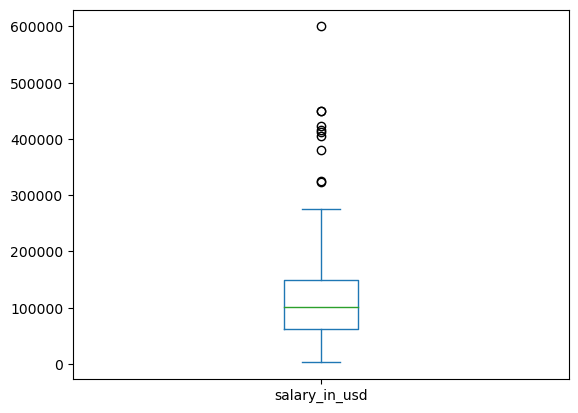

In [11]:
df['salary_in_usd'].plot(kind='box')

<Axes: ylabel='Frequency'>

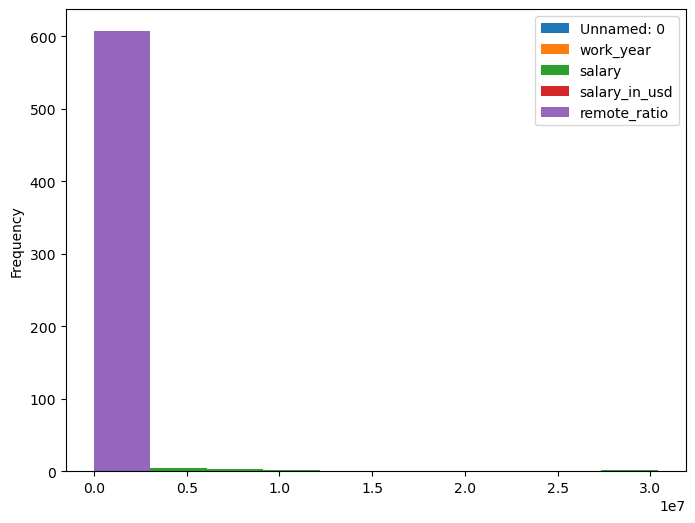

In [12]:
# show the distrubion of the data
df.plot(kind='hist', figsize=(8,6), lw=1)

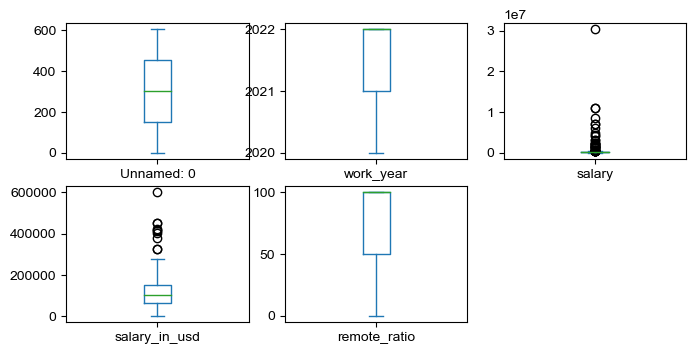

In [13]:
df.plot.box(subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(8,6))
sns.set_style('darkgrid')
plt.show()

In [14]:
# Subset data: Remove outliers for "salary"
#low, high = df["salary"].quantile([0.1, 0.9])
#outliers_area = df["salary"].between(low, high)
#df = df[outliers_area]

In [15]:
#df.plot.box(subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(8,6))
#sns.set_style('darkgrid')
#plt.show()

In [16]:
# get the categorical columns from the dataset
object_col=[]
cols= df.columns
for col in cols:
    if df[col].dtype == object:
        object_col.append(col)

In [17]:
object_col

['experience_level',
 'employment_type',
 'job_title',
 'salary_currency',
 'employee_residence',
 'company_location',
 'company_size']

In [18]:
# show the categorical dataframe 
df[object_col]

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
0,MI,FT,Data Scientist,EUR,DE,DE,L
1,SE,FT,Machine Learning Scientist,USD,JP,JP,S
2,SE,FT,Big Data Engineer,GBP,GB,GB,M
3,MI,FT,Product Data Analyst,USD,HN,HN,S
4,SE,FT,Machine Learning Engineer,USD,US,US,L
...,...,...,...,...,...,...,...
602,SE,FT,Data Engineer,USD,US,US,M
603,SE,FT,Data Engineer,USD,US,US,M
604,SE,FT,Data Analyst,USD,US,US,M
605,SE,FT,Data Analyst,USD,US,US,M


In [19]:
# get all the numerical variables from the dataset
num_col=[]
cols= df.columns
for col in cols:
    if df[col].dtype != object:
        num_col.append(col)

In [20]:
num_col

['Unnamed: 0', 'work_year', 'salary', 'salary_in_usd', 'remote_ratio']

In [21]:
# show the numerical dataframe
df[num_col]

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
0,0,2020,70000,79833,0
1,1,2020,260000,260000,0
2,2,2020,85000,109024,50
3,3,2020,20000,20000,0
4,4,2020,150000,150000,50
...,...,...,...,...,...
602,602,2022,154000,154000,100
603,603,2022,126000,126000,100
604,604,2022,129000,129000,0
605,605,2022,150000,150000,100


# Analysing salary trends across different various job titles and experience levels

C:\Users\akim\AppData\Local\Temp\ipykernel_12188\1114568240.py:5: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0, 50, 2)


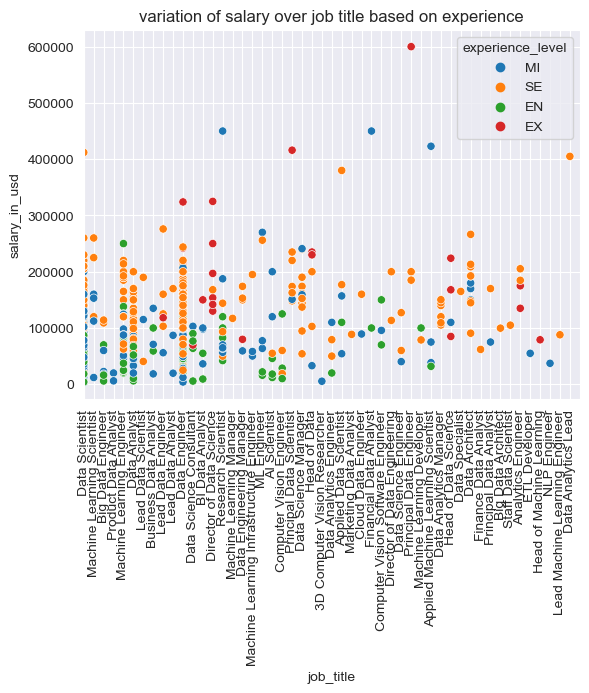

In [22]:
# Analysing salary trends across different various job titles and experience levels
sns.scatterplot(x='job_title', y='salary_in_usd', data=df, hue='experience_level')
sns.set_style('darkgrid')

plt.xlim(0, 50, 2)
plt.xlabel('job_title')
plt.xticks(rotation='vertical')
plt.ylabel('salary_in_usd')
plt.title('variation of salary over job title based on experience')
plt.show()

C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with 

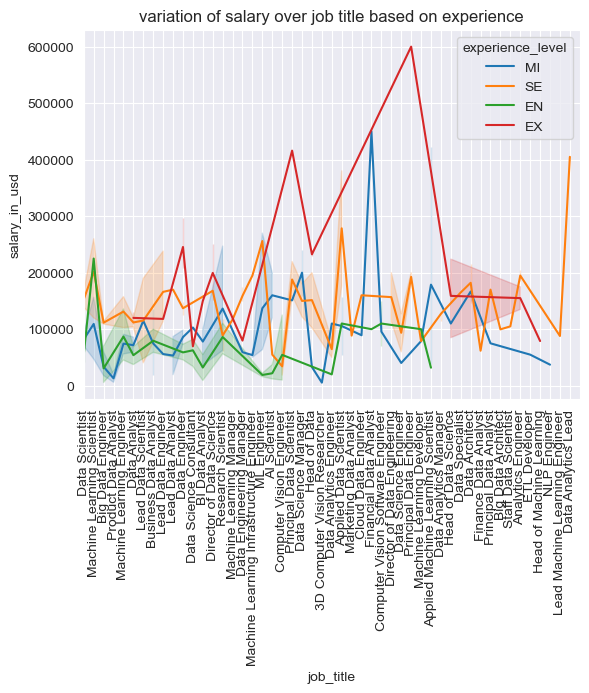

In [23]:
sns.lineplot(x='job_title', y='salary_in_usd', data=df, hue='experience_level')
sns.set_style('darkgrid')

plt.xlim(0, 50, 2)
plt.xlabel('job_title')
plt.xticks(rotation='vertical')
plt.ylabel('salary_in_usd')
plt.title('variation of salary over job title based on experience')
plt.show()

C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


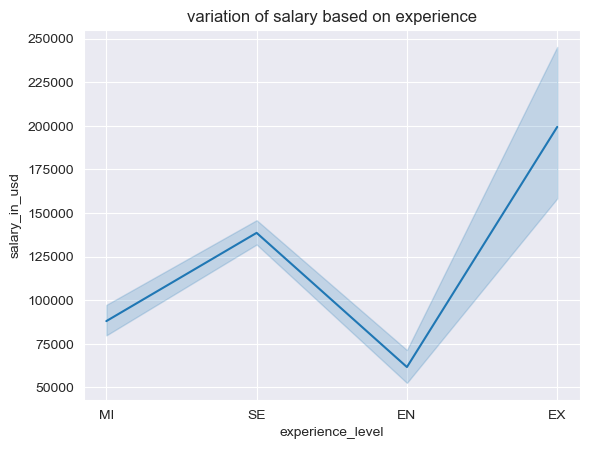

In [24]:
sns.lineplot(x='experience_level', y='salary_in_usd', data=df)
sns.set_style('darkgrid')


plt.xlabel('experience_level')
plt.ylabel('salary_in_usd')
plt.title('variation of salary based on experience')
plt.show()

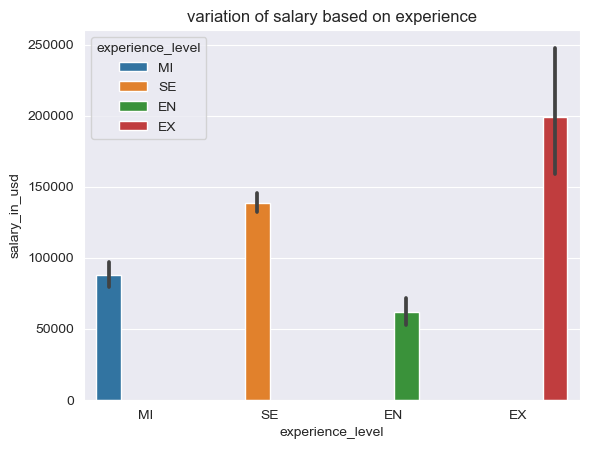

In [25]:
sns.barplot(x='experience_level', y='salary_in_usd', hue='experience_level', data=df)
sns.set_style('darkgrid')

plt.xlabel('experience_level')
plt.ylabel('salary_in_usd')
plt.title('variation of salary based on experience')
plt.show()

C:\Users\akim\AppData\Local\Temp\ipykernel_12188\2318917297.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='job_title', y='salary_in_usd', data=df, ci=None)


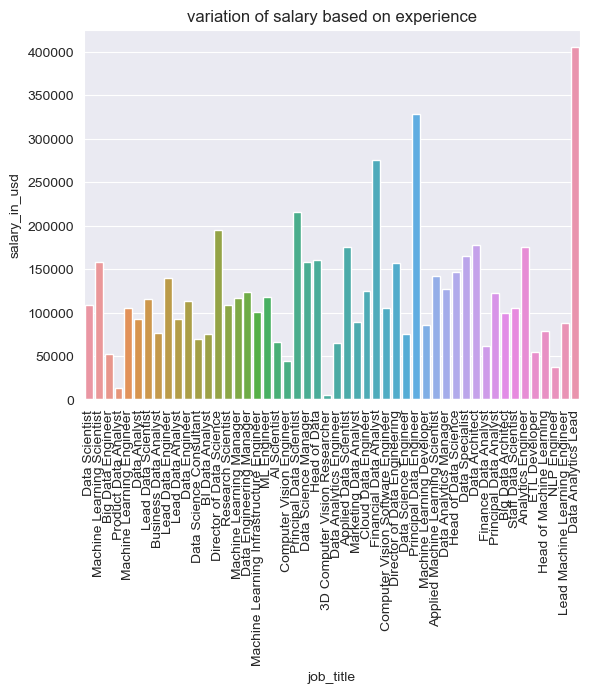

In [26]:
sns.barplot(x='job_title', y='salary_in_usd', data=df, ci=None)

plt.xlabel('job_title')
plt.xticks(rotation='vertical')
plt.ylabel('salary_in_usd')
plt.title('variation of salary based on experience')
plt.show()

C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldc

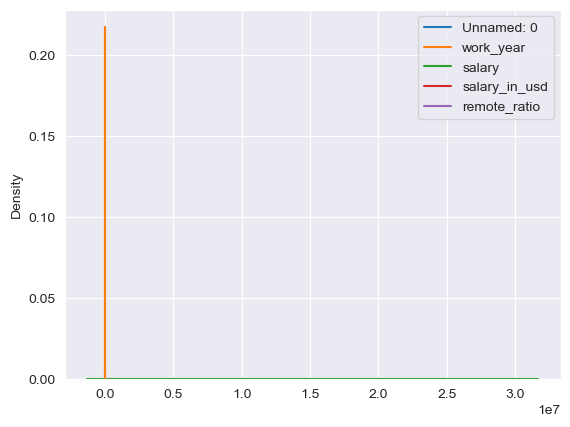

In [27]:
sns.kdeplot(data=df)
sns.set_style('darkgrid')

Text(0.5, 1.0, 'salary_in_usd paid by company_size based on experience_level')

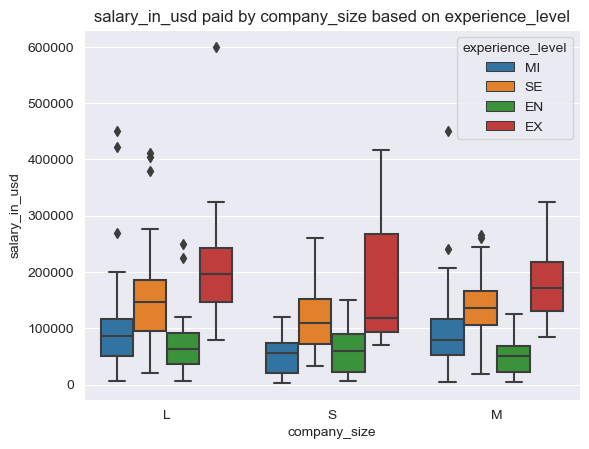

In [28]:
sns.boxplot(x='company_size', y='salary_in_usd', data=df, hue='experience_level')
sns.set_style('darkgrid')
plt.xlabel('company_size')
plt.ylabel('salary_in_usd')
plt.title('salary_in_usd paid by company_size based on experience_level')

Text(0.5, 1.0, 'salary_in_usd paid by company_size based on experience_level')

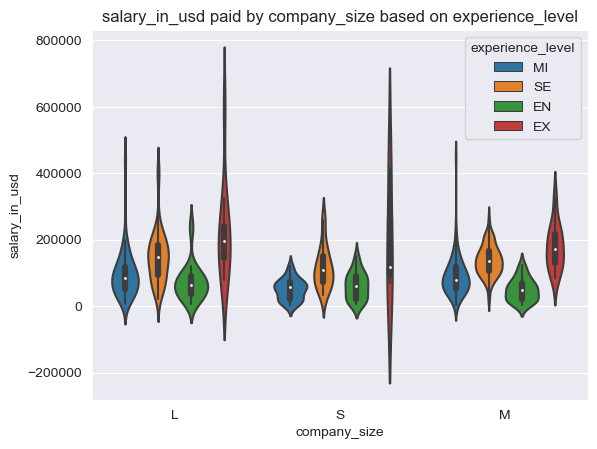

In [29]:
sns.violinplot(x='company_size', y='salary_in_usd', data=df, hue='experience_level')
sns.set_style('darkgrid')
plt.xlabel('company_size')
plt.ylabel('salary_in_usd')
plt.title('salary_in_usd paid by company_size based on experience_level')

C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0.5, 1.0, 'salary_in_usd vs company_size')

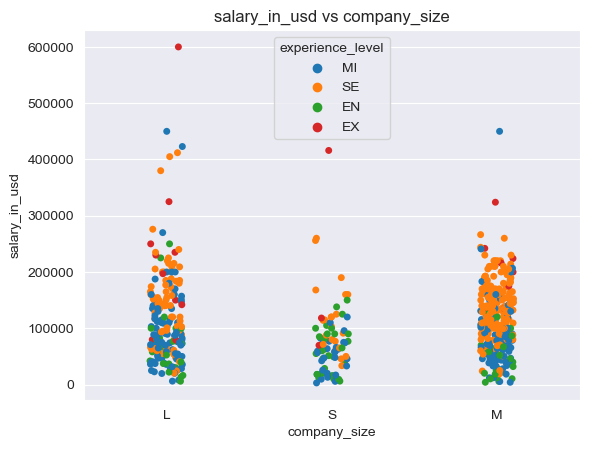

In [30]:
sns.stripplot(x='company_size', y='salary_in_usd', data=df, hue='experience_level')
sns.set_style('darkgrid')
plt.xlabel('company_size')
plt.ylabel('salary_in_usd')
plt.title('salary_in_usd vs company_size')

In [31]:
df.head(7)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S


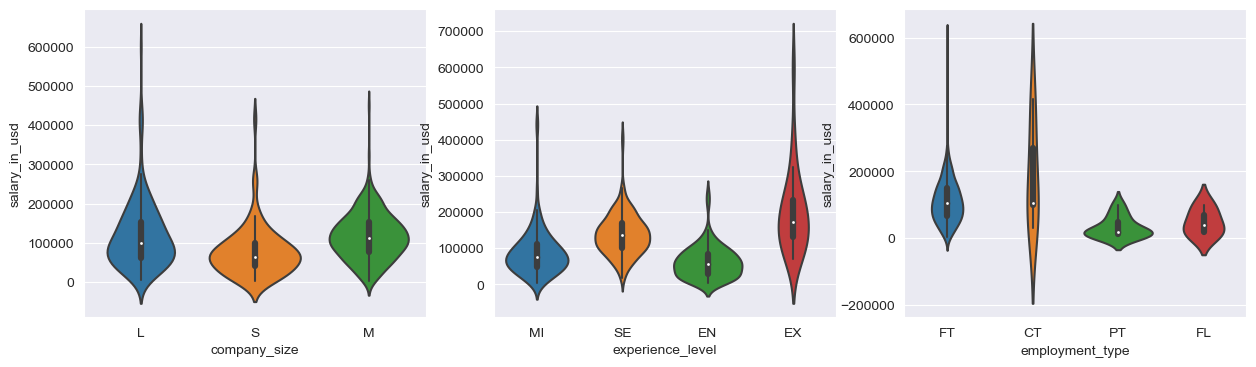

In [32]:
plt.figure(figsize=(15,4))
sns.set_style('darkgrid')
plt.subplot(1,3,1)
sns.violinplot(x='company_size', y='salary_in_usd', data=df)
plt.subplot(1,3,2)
sns.violinplot(x='experience_level', y='salary_in_usd', data=df)
plt.subplot(1,3,3)
sns.violinplot(x='employment_type', y='salary_in_usd', data=df);

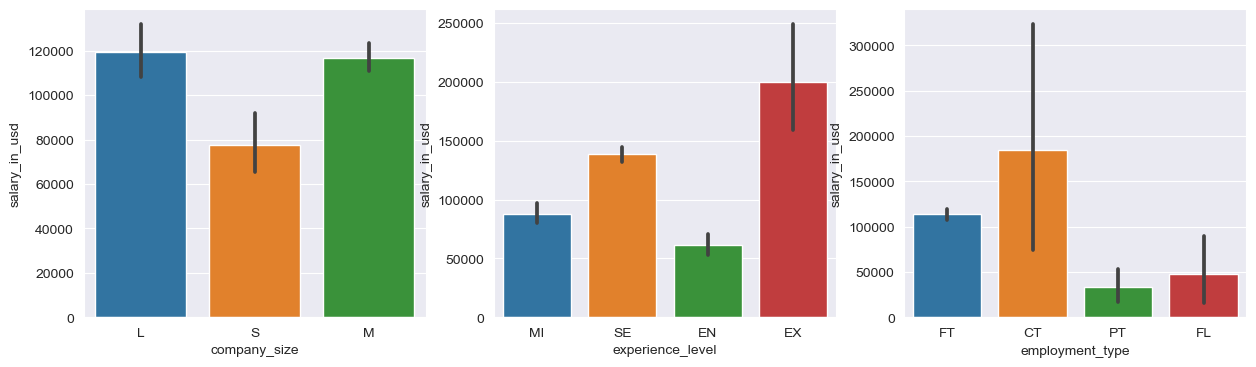

In [33]:
plt.figure(figsize=(15,4))
sns.set_style('darkgrid')
plt.subplot(1,3,1)
sns.barplot(x='company_size', y='salary_in_usd', data=df)
plt.subplot(1,3,2)
sns.barplot(x='experience_level', y='salary_in_usd', data=df)
plt.subplot(1,3,3)
sns.barplot(x='employment_type', y='salary_in_usd', data=df);

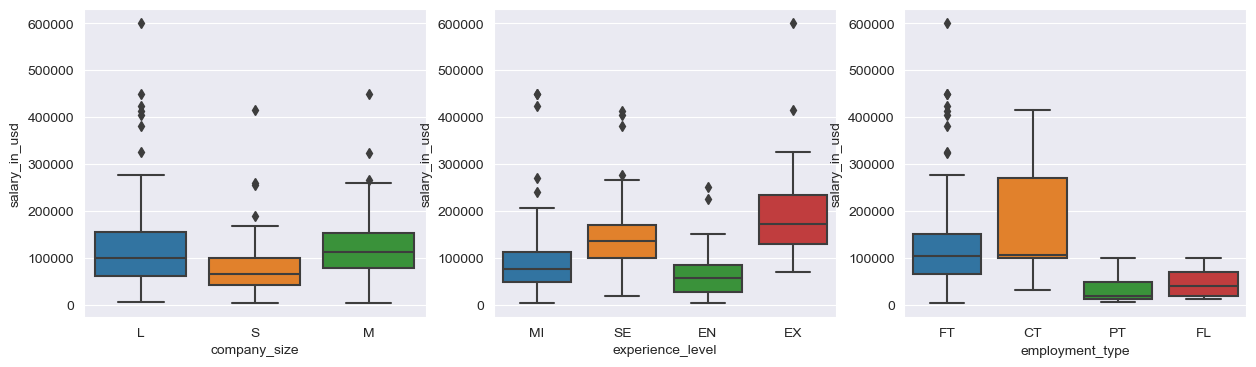

In [34]:
plt.figure(figsize=(15,4))
sns.set_style('darkgrid')
plt.subplot(1,3,1)
sns.boxplot(x='company_size', y='salary_in_usd', data=df)
plt.subplot(1,3,2)
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.subplot(1,3,3)
sns.boxplot(x='employment_type', y='salary_in_usd', data=df);

In [35]:
df.employment_type.unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

# investigating the impact of remote work on compensation

In [36]:
df.remote_ratio.unique()

array([  0,  50, 100], dtype=int64)

In [37]:
df[['company_location', 'employee_residence', 'remote_ratio']].iloc[0:7]

,company_location,employee_residence,remote_ratio
0,DE,DE,0
1,JP,JP,0
2,GB,GB,50
3,HN,HN,0
4,US,US,50
5,US,US,100
6,US,US,100


In [38]:
df[df['remote_ratio']==0].iloc[:5]

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
10,10,2020,EN,FT,Data Scientist,45000,EUR,51321,FR,0,FR,S
11,11,2020,MI,FT,Data Scientist,3000000,INR,40481,IN,0,IN,L


# comparing salary levels between full-time and part-time employment

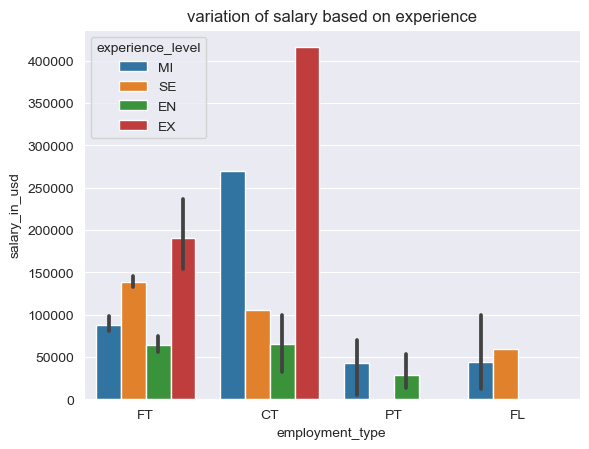

In [39]:
# comparing salary levels between full-time and part-time employment
sns.barplot(x='employment_type', y='salary_in_usd', hue='experience_level', data=df)
sns.set_style('darkgrid')

plt.xlabel('employment_type')
plt.ylabel('salary_in_usd')
plt.title('variation of salary based on experience')
plt.show()

C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


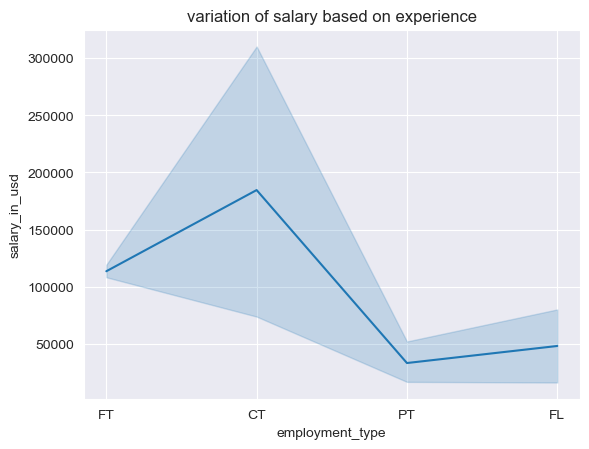

In [40]:
sns.lineplot(x='employment_type', y='salary_in_usd', data=df)
sns.set_style('darkgrid')

plt.xlabel('employment_type')
plt.ylabel('salary_in_usd')
plt.title('variation of salary based on experience')
plt.show()

# the correlation between company size and employee salaries

<Axes: >

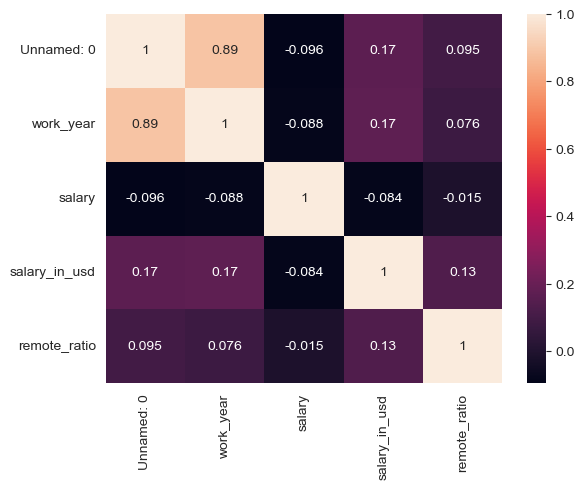

In [41]:
# the correlation between company size and employee salaries
sns.heatmap(df[num_col].corr(), annot=True, cbar='viridis')

Text(0.5, 1.0, 'correlation between salary_in_usd and company_size')

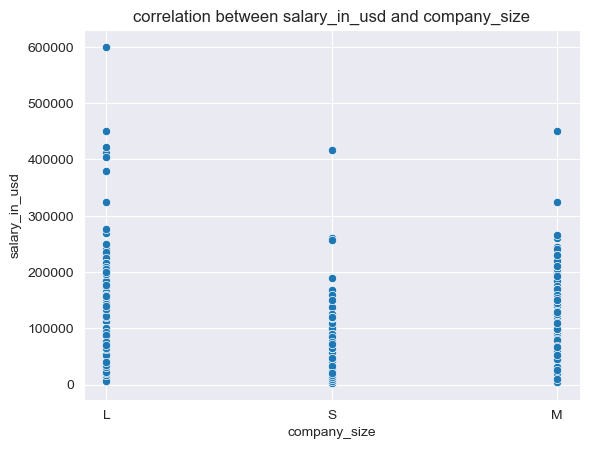

In [42]:
sns.scatterplot(x='company_size', y='salary_in_usd', data=df)
sns.set_style('darkgrid')
plt.xlabel('company_size')
plt.ylabel('salary_in_usd')
plt.title('correlation between salary_in_usd and company_size')

# correlation between company size and employee salaries
-H0:No correlation between company size and employee salaries

-H1: there's a correlation between company size and employee salaries


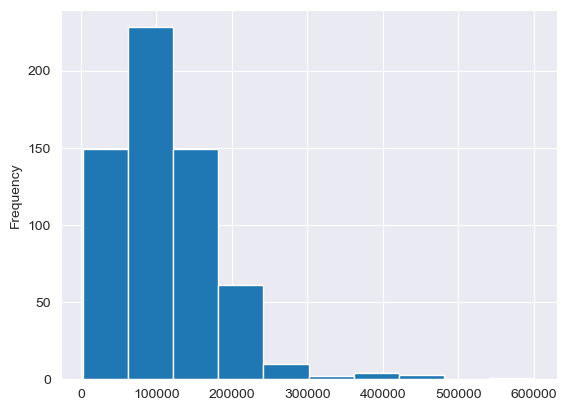

In [43]:
df['salary_in_usd'].plot(kind='hist');

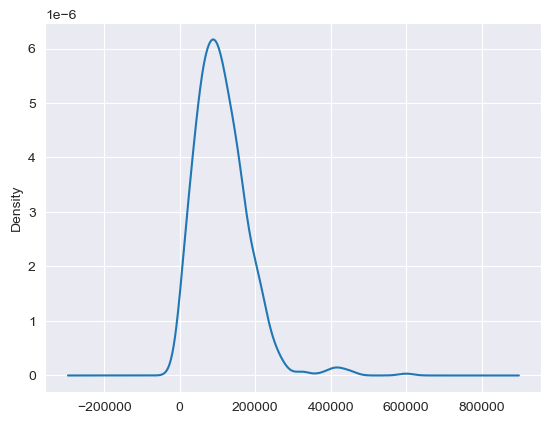

In [44]:
df['salary_in_usd'].plot(kind='density');

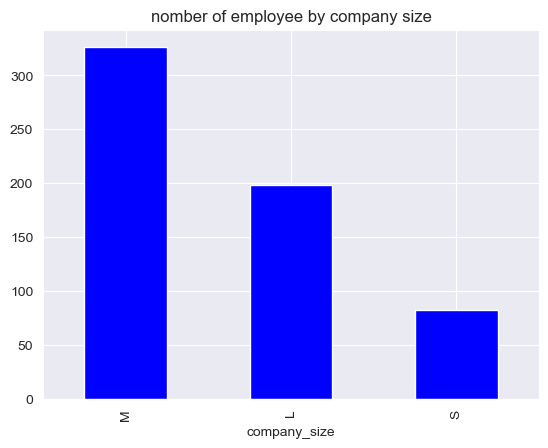

In [45]:
df['company_size'].value_counts().sort_values(ascending=False).plot(kind='bar', color='blue', label='company_size')
plt.title('nomber of employee by company size');

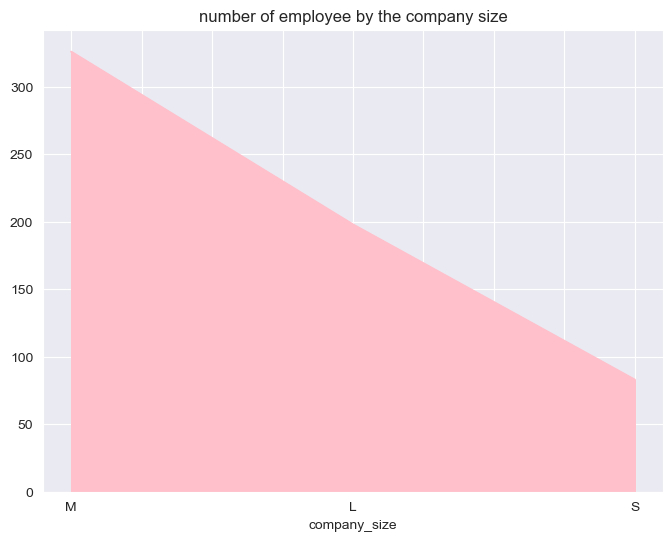

In [46]:
df['company_size'].value_counts().sort_values(ascending=False).plot(kind='area', color='pink', figsize=(8,6))
plt.title('number of employee by the company size');

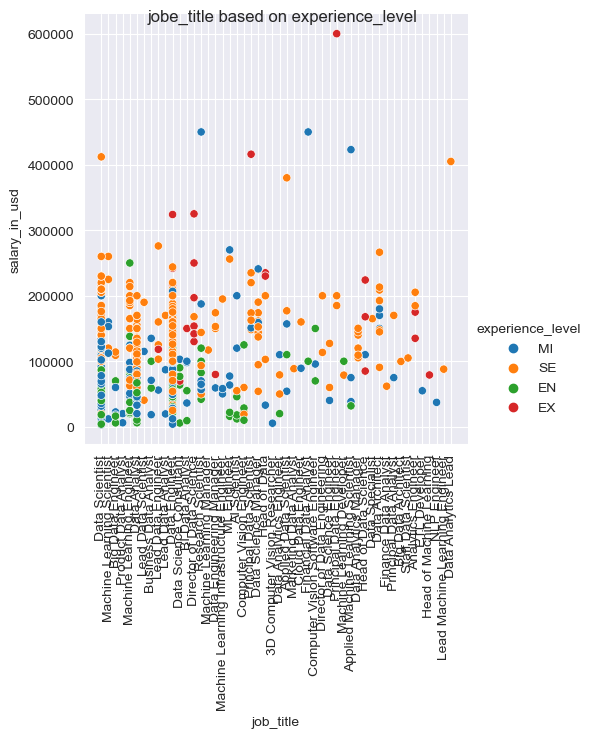

<Figure size 800x600 with 0 Axes>

In [47]:
g=sns.relplot(x='job_title', y='salary_in_usd', data=df, kind='scatter', color='blue', hue='experience_level')
g.fig.suptitle('jobe_title based on experience_level')
plt.xticks(rotation='vertical')
plt.figure(figsize=(8,6))
plt.show()

C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with 

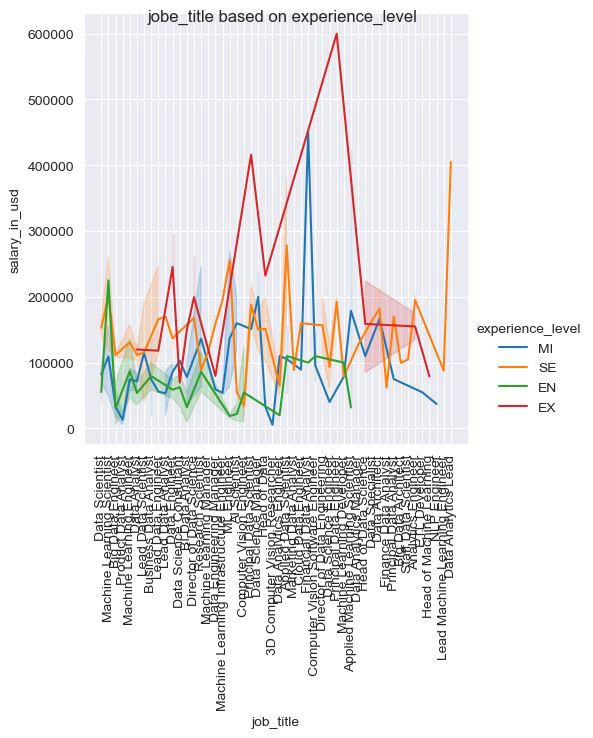

<Figure size 800x600 with 0 Axes>

In [48]:
g=sns.relplot(x='job_title', y='salary_in_usd', data=df, kind='line', color='blue', hue='experience_level')
g.fig.suptitle('jobe_title based on experience_level')
plt.xticks(rotation='vertical')
plt.figure(figsize=(8,6))

plt.show();


C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldc

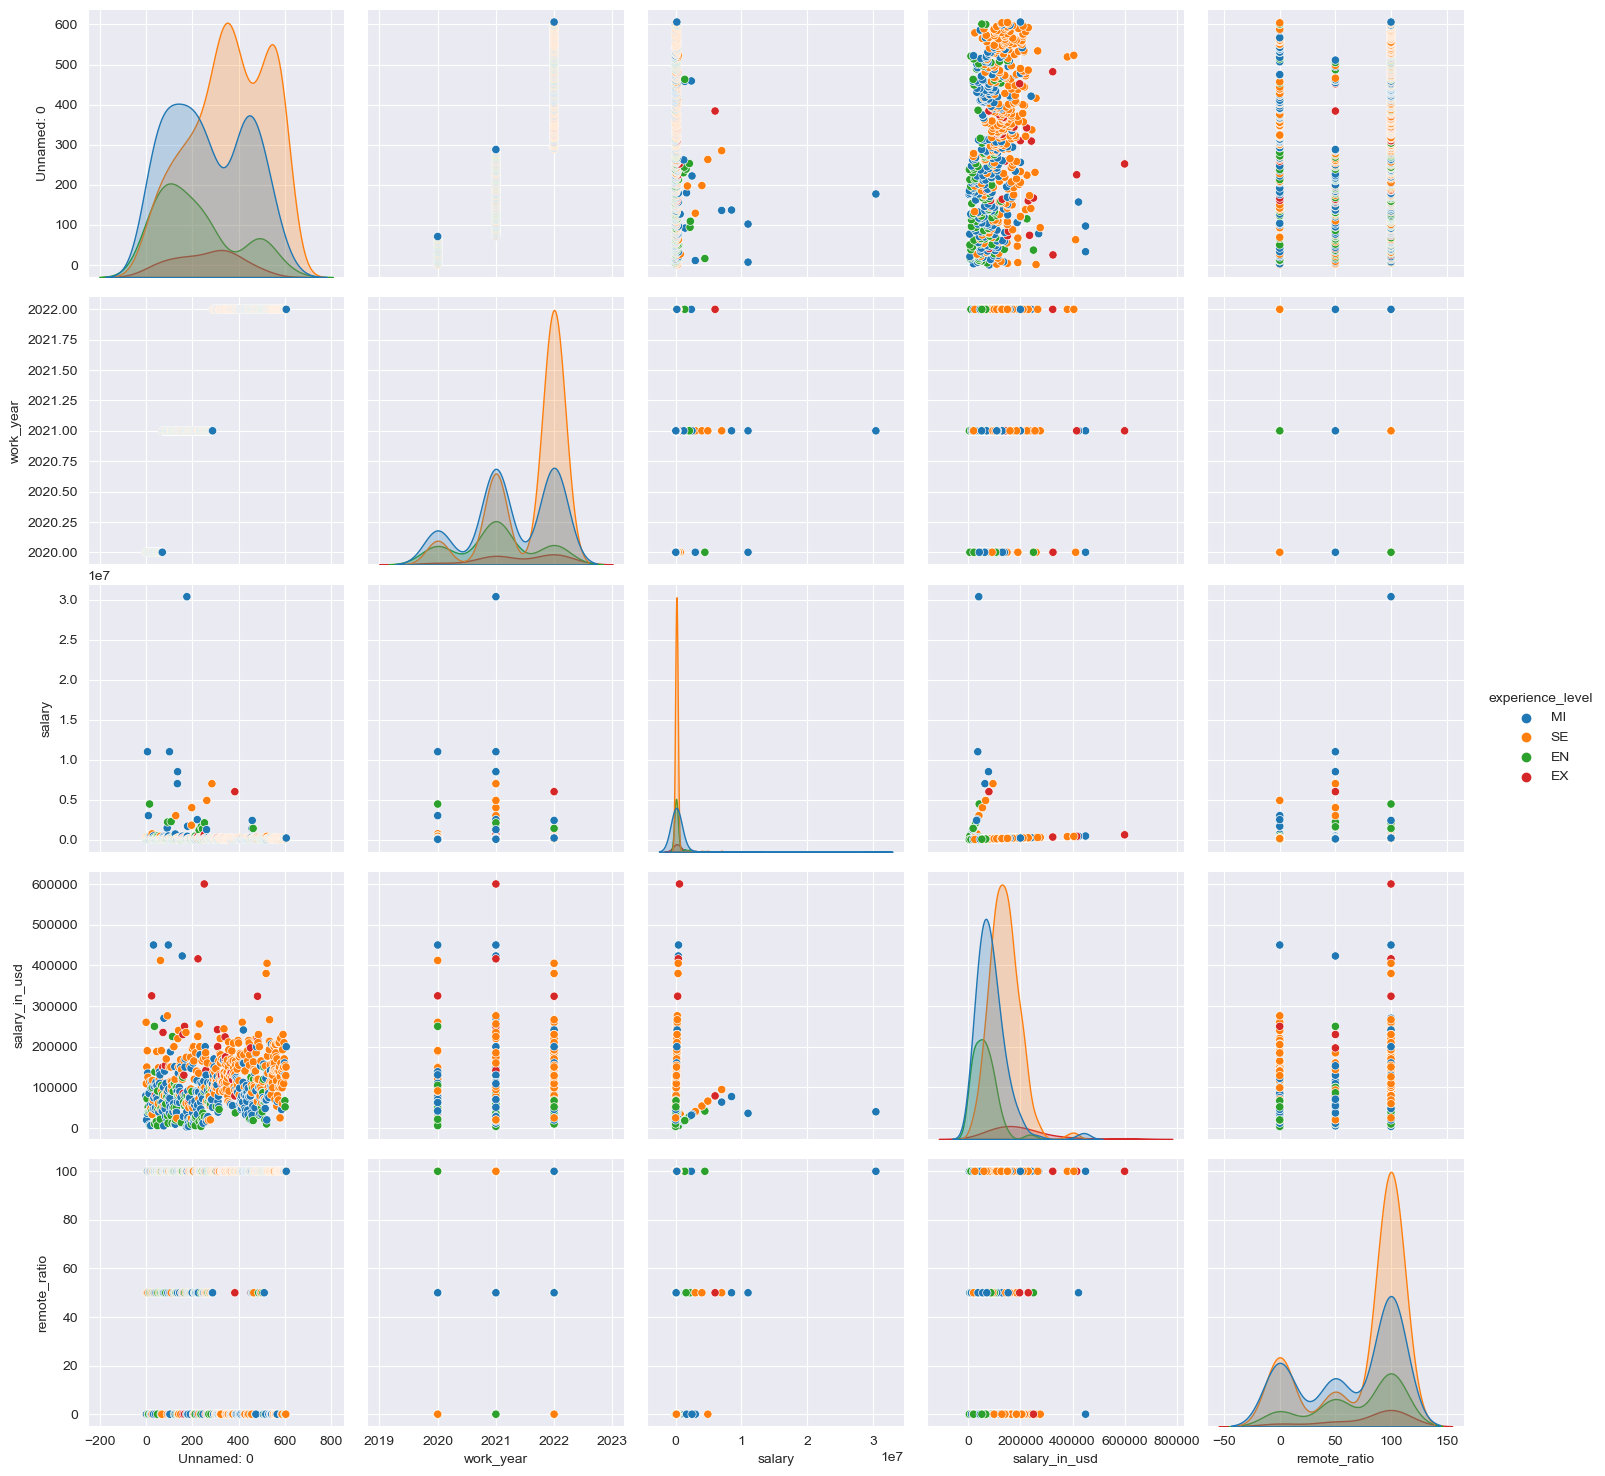

In [49]:
sns.pairplot(df, hue='experience_level', height=3);

In [50]:
from scipy.stats import f_oneway

In [51]:
#ANOVA (F-TEST)
df_anova = pd.read_csv('ds_salaries.csv')
df_anova = df_anova[['salary_in_usd', 'company_size']]
grps = pd.unique(df_anova.company_size.values)
print(grps)
d_data = {grp:df_anova['salary_in_usd'][df_anova.company_size == grp] for grp in grps}
print(d_data)

['L' 'S' 'M']
{'L': 0       79833
4      150000
5       72000
7       35735
8      135000
        ...  
524    135000
525    177000
550    205300
551    140400
606    200000
Name: salary_in_usd, Length: 198, dtype: int64, 'S': 1      260000
3       20000
6      190000
9      125000
10      51321
        ...  
510    150000
512     65000
513     71444
515     48000
522     20000
Name: salary_in_usd, Length: 83, dtype: int64, 'M': 2      109024
12      39916
18       5707
19      56000
20      43331
        ...  
601     52000
602    154000
603    126000
604    129000
605    150000
Name: salary_in_usd, Length: 326, dtype: int64}


In [52]:
F, p = f_oneway(d_data['L'], d_data['S'], d_data['M'])
print('p-value for significance:', p)
if p<0.05:
    print('reject null hypothesis')
else:
    print('accept null hypothesis')

p-value for significance: 8.071991905906015e-06
reject null hypothesis


# predictive analysis for forecasting salaries based on experience and job roles

In [53]:
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split


# SPLIT THE DATA

In [54]:
features= ['experience_level', 'job_title', 'employment_type']
target = 'salary_in_usd'

In [55]:
X_train = df[features]
y_train = df[target]

In [56]:
# cheak the work
print(X_train.shape)
print(y_train.shape)

(607, 3)
(607,)


# BUILD THE MODEL

# baseline

In [57]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean]*len(y_train)

In [58]:
print("Mean salary:",round( y_mean,2))

print("Baseline MAE:", mean_absolute_error(y_train, y_pred_baseline))

Mean salary: 112297.87
Baseline MAE: 52584.27064261269


In [59]:
ohe = OneHotEncoder()
ohe.fit(X_train)
XT_train = ohe.transform(X_train)

model = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    LinearRegression()
    )
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                ('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

In [60]:
#model.score(X_train, y_train)

# evaluate

In [64]:
y_pred_training = model.predict(X_train)
print("Training MAE:", mean_absolute_error(y_train, y_pred_training))

Training MAE: 38447.34820575187


In [65]:
X_test = pd.read_csv("ds_salaries.csv")[features]
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

0     92120.565656
1    199178.693958
2     97617.607843
3     13036.276968
4    135145.915119
dtype: float64

In [67]:
print("Training MAE:", mean_absolute_error(y_pred_test, y_train))

Training MAE: 38447.34820575187


In [68]:
def make_prediction(experience_level, job_title, employment_type):
    
    data ={"experience_level":experience_level,
           "job_title":job_title,
           "employment_type":employment_type,
          }
    
    df=pd.DataFrame(data, index=[0])
    prediction = model.predict(df).round(2)[0]
                    
    return f"Predicted salary: ${prediction}"

In [69]:
make_prediction("EX", "BI Data Analyst", "PT")

'Predicted salary: $143174.39'

# another method

In [70]:
ohe = OneHotEncoder(handle_unknown='ignore')
transformedX = ohe.fit_transform(X_train)
ohe.fit(X_train)
XT_train = ohe.transform(X_train)

model = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    Ridge()
    )
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                ('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

In [71]:
y_pred_training = model.predict(X_train)
print("Training MAE:", mean_absolute_error(y_train, y_pred_training))

Training MAE: 39218.495079088745


In [72]:
X_test = pd.read_csv("ds_salaries.csv")[features]
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

0     91631.295902
1    191686.744899
2    102250.338553
3     40025.875382
4    135109.967757
dtype: float64

In [73]:
def make_prediction(experience_level, job_title, employment_type):
    
    data ={"experience_level":experience_level,
           "job_title":job_title,
           "employment_type":employment_type,
          }
    
    df=pd.DataFrame(data, index=[0])
    prediction = model.predict(df).round(2)[0]
                    
    return f"Predicted salary: ${prediction}"

In [74]:
make_prediction("EX", "BI Data Analyst", "PT")

'Predicted salary: $140022.48'